<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0808/AI_hub_data_%EB%9D%BC%EB%B2%A8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import shutil
import json
import glob
import os
import matplotlib.pyplot as plt
from zipfile import ZipFile

### 라벨 데이터 불러오기(K-fashion)

In [2]:
!gdown 1z9U3kcQo3-wg6uujqUKuMUMRh34gB8Ji

Downloading...
From: https://drive.google.com/uc?id=1z9U3kcQo3-wg6uujqUKuMUMRh34gB8Ji
To: /content/라벨링데이터.zip
100% 138M/138M [00:01<00:00, 87.4MB/s]


In [3]:
import os
os.mkdir('/content/vaild/')

In [4]:
%cd /content/vaild/

/content/vaild


In [5]:
# !unzip '*.zip'
!unzip '/content/라벨링데이터.zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: 페미닌/65205.json    
  inflating: 페미닌/65219.json    
  inflating: 페미닌/65231.json    
  inflating: 페미닌/654915.json   
  inflating: 페미닌/655294.json   
  inflating: 페미닌/655304.json   
  inflating: 페미닌/655314.json   
  inflating: 페미닌/655324.json   
  inflating: 페미닌/655335.json   
  inflating: 페미닌/655345.json   
  inflating: 페미닌/655355.json   
  inflating: 페미닌/655585.json   
  inflating: 페미닌/655595.json   
  inflating: 페미닌/655605.json   
  inflating: 페미닌/655615.json   
  inflating: 페미닌/655793.json   
  inflating: 페미닌/66054.json    
  inflating: 페미닌/660700.json   
  inflating: 페미닌/6608.json     
  inflating: 페미닌/66125.json    
  inflating: 페미닌/66136.json    
  inflating: 페미닌/66146.json    
  inflating: 페미닌/66220.json    
  inflating: 페미닌/662283.json   
  inflating: 페미닌/662293.json   
  inflating: 페미닌/662303.json   
  inflating: 페미닌/662383.json   
  inflating: 페미닌/662393.json   
  inflating: 페미닌/66240.json    
  inflating: 페미닌/662403.json   
  in

#### y라벨 생성

In [6]:
# 라벨 사전 만들기

name =['dress', 'outer', 'pants_black', 'pants_jeans', 'pants_others', 'pants_white', 'shoes', 'skirt', 'top_black', 'top_others', 'top_white']

name_dic ={}
for idx, value in enumerate(name):
    name_dic[value] = idx
name_dic

{'dress': 0,
 'outer': 1,
 'pants_black': 2,
 'pants_jeans': 3,
 'pants_others': 4,
 'pants_white': 5,
 'shoes': 6,
 'skirt': 7,
 'top_black': 8,
 'top_others': 9,
 'top_white': 10}

### 하드코딩(라벨별 데이터 폴더로 저장)

#### 이미지 데이터 불러오기

In [7]:
%cd /content

/content


In [ ]:
# 스트리트 데이터 추가
!gdown 1Z0rcTJkhIfEs2iEC5oWvQS1RxLXipDQa

Downloading...
From: https://drive.google.com/uc?id=1Z0rcTJkhIfEs2iEC5oWvQS1RxLXipDQa
To: /content/스트리트.zip
100% 3.49G/3.49G [00:38<00:00, 90.9MB/s]


In [ ]:
!unzip /content/스트리트.zip

#### 파일 만들기

In [12]:
path = '/content/test'
os.mkdir(path)
os.mkdir('/content/data')

In [27]:
folder_pahtes = '/content/vaild/모던' # json 파일 폴더
save_folder = '/content/data'
img_txt_folder = path
label_path = {} # 라벨별 txt 파일 이름

data_json = {} # 데이터 개수 확인용 딕셔너리

color_dic = {'화이트':'white', '블랙': 'black'} # 화이트/ 블랙 확인용
key_dic = {'아우터':'outer', '원피스':'dress'} # 키 변경용

for pathes in os.listdir(folder_pahtes):
    json_path = f'{folder_pahtes}/{pathes}'
    filename = pathes.split('.')[0]

    with open(json_path, 'r', encoding = 'utf-8') as file: # json 열기
        data = json.load(file)

        image_width = data['이미지 정보']['이미지 너비']
        image_height = data['이미지 정보']['이미지 높이']

        bbox = data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'] # bbox
        poly = data['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'] # 폴리곤
        labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링'] # 라벨링(소재/색상)

        for key, values in labeling.items():

            if '카테고리' in values[0] and '색상' in values[0]:
                # with open(f'{path}/{pathes[:-5]}.txt', 'a') as f:
                with open(f'{path}/{pathes[:-5]}.txt', 'a') as f:

                    # bbox 좌표 생성
                    try:
                        xmin, ymin, w, h = list(bbox[key][0].values()) # bbox 좌표 리스트

                        x_relative = (xmin + w / 2) / image_width
                        y_relative = (ymin + h / 2) / image_height

                        width_relative = w / image_width
                        height_relative = h / image_height
                    except:
                        continue

                    # 라벨 생성
                    color = labeling[key][0]['색상'] # 색상 저장 변수

                    if key == '하의':
                        if labeling[key][0]['카테고리'] == '청바지':
                            label = f'pants_jeans'

                        elif labeling[key][0]['카테고리'] == '스커트':
                            label = f'skirt'

                        else:
                            label = f'pants_{color_dic.get(color, "others")}'

                    elif key == '상의':
                        label = f'top_{color_dic.get(color, "others")}'

                    else:
                        label = key_dic.get(key, key) # 영문으로 변환

                        # 데이터 개수 확인용
                    if label not in data_json:
                        data_json[label] = 1
                    else:
                        data_json[label] += 1

                    # 라벨별 txt 파일 이름 저장
                    if label not in label_path:
                        label_path[label] = []
                        label_path[label].append(f'{pathes[:-5]}.txt')
                    else:
                        label_path[label].append(f'{pathes[:-5]}.txt')

                    label_num = name_dic.get(label, value) # 정수로 변환

                    f.write(f'{label_num} {x_relative} {y_relative} {width_relative} {height_relative}\n')
                f.close()

import shutil

# 라벨별로 데이터를 저장합니다
labelname = ['dress', 'outer', 'pants_black', 'pants_jeans', 'pants_others', 'pants_white', 'skirt', 'top_black', 'top_others', 'top_white']
image_folder = '/content/001'

for n in labelname:
    save_folder_path = f'{save_folder}/{n}'

    # 목적지 폴더가 존재하지 않으면 생성합니다
    if not os.path.exists(save_folder_path):
        os.makedirs(save_folder_path)

    for i in label_path[n][:150]: # label_path[n][:개수] 적으면 지정한 개수만큼 데이터가 저장됩니다
        # txt 파일 경로
        txt_path = f'{path}/{i}'

        # 이미지 파일 경로
        image_path = f'{image_folder}/{i[:-4]}.jpg'

        try:
            # txt 파일이 이미 목적지 폴더에 존재하는지 확인합니다
            if not os.path.exists(os.path.join(save_folder_path, os.path.basename(txt_path))):
                # txt 파일을 목적지 폴더로 복사합니다
                shutil.copy(txt_path, save_folder_path)
            # 이미지 파일이 이미 목적지 폴더에 존재하는지 확인합니다
            if not os.path.exists(os.path.join(save_folder_path, os.path.basename(image_path))):
                # 이미지 파일을 목적지 폴더로 복사합니다
                shutil.copy(image_path, save_folder_path)
        except Exception as e:
            print(f"파일 복사 중 오류 발생: {e}")
            continue

In [ ]:
# 이미지/텍스트 파일 한 폴더로 저장하기- 이미 label_path와 폴더에 txt 파일이 저장되어 있는 경우
import shutil

# 라벨별로 데이터를 저장합니다
labelname = ['dress', 'outer', 'pants_black', 'pants_jeans', 'pants_others', 'pants_white', 'skirt', 'top_black', 'top_others', 'top_white']
image_folder = '/content/소피스트케이티드'

for n in labelname:
    save_folder_path = f'{save_folder}/{n}'

    # 목적지 폴더가 존재하지 않으면 생성합니다
    if not os.path.exists(save_folder_path):
        os.makedirs(save_folder_path)

    for i in label_path[n]:
        # txt 파일 경로
        txt_path = f'{path}/{i}'

        # 이미지 파일 경로
        image_path = f'{image_folder}/{i[:-4]}.jpg'

        try:
            # txt 파일이 이미 목적지 폴더에 존재하는지 확인합니다
            if not os.path.exists(os.path.join(save_folder_path, os.path.basename(txt_path))):
                # txt 파일을 목적지 폴더로 복사합니다
                shutil.copy(txt_path, save_folder_path)
            # 이미지 파일이 이미 목적지 폴더에 존재하는지 확인합니다
            if not os.path.exists(os.path.join(save_folder_path, os.path.basename(image_path))):
                # 이미지 파일을 목적지 폴더로 복사합니다
                shutil.copy(image_path, save_folder_path)
        except Exception as e:
            print(f"파일 복사 중 오류 발생: {e}")
            continue

In [28]:
data_json

{'outer': 1883,
 'top_others': 2847,
 'pants_black': 1569,
 'pants_white': 704,
 'skirt': 794,
 'dress': 1752,
 'pants_others': 1175,
 'top_black': 943,
 'top_white': 1799,
 'pants_jeans': 393}

In [ ]:
len(os.listdir('/content/data/outer'))

300

In [ ]:
# 각 키에 해당하는 값의 개수를 저장할 빈 딕셔너리를 생성합니다
value_counts = {}

# 딕셔너리의 각 키와 값을 순회합니다
for key, value in label_path.items():
    # 현재 키에 해당하는 값의 개수를 value_counts 딕셔너리에 저장합니다
    value_counts[key] = len(value)

print(value_counts)

{'top_others': 22422, 'outer': 8396, 'pants_jeans': 15149, 'dress': 3860, 'skirt': 4452, 'top_white': 11382, 'pants_white': 3317, 'top_black': 3412, 'pants_black': 3706, 'pants_others': 5131}


##### 폴더 1개로 test

In [ ]:
os.mkdir('/content/data')

In [ ]:
folder_pahtes = '/content/vaild/스트리트' # json 파일 폴더
data_json = {} # 데이터 개수 확인용 딕셔너리

color_dic = {'화이트':'white', '블랙': 'black'} # 화이트/ 블랙 확인용
key_dic = {'아우터':'outer', '원피스':'dress'} # 키 변경용

for pathes in os.listdir(folder_pahtes)[22000:27000]:
    json_path = f'{folder_pahtes}/{pathes}'

    with open(json_path, 'r', encoding = 'utf-8') as file: # json 열기
        data = json.load(file)

        image_width = data['이미지 정보']['이미지 너비']
        image_height = data['이미지 정보']['이미지 높이']

        bbox = data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'] # bbox
        poly = data['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'] # 폴리곤
        labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링'] # 라벨링(소재/색상)

        for key, values in labeling.items():
            if '카테고리' in values[0] and '색상' in values[0]:
                with open(f'/content/data/{pathes[:-5]}.txt', 'a') as f:

                    # bbox 좌표 생성
                    try:
                        xmin, ymin, w, h = list(bbox[key][0].values()) # bbox 좌표 리스트

                        x_relative = (xmin + w / 2) / image_width
                        y_relative = (ymin + h / 2) / image_height

                        width_relative = w / image_width
                        height_relative = h / image_height
                    except:
                        continue


                    # 라벨 생성
                    color = labeling[key][0]['색상'] # 색상 저장 변수

                    if key == '하의':
                        if labeling[key][0]['카테고리'] == '청바지':
                            label = f'pants_jeans'

                        elif labeling[key][0]['카테고리'] == '스커트':
                            label = f'skirt'

                        else:
                            label = f'pants_{color_dic.get(color, "others")}'

                    elif key == '상의':
                        label = f'top_{color_dic.get(color, "others")}'

                    else:
                        label = key_dic.get(key, key) # 영문으로 변환


                        # 데이터 개수 확인용
                    if label not in data_json:
                        data_json[label] = 1
                    else:
                        data_json[label] += 1

                    label = name_dic.get(key, key) # 정수로 변환

                    f.write(f'{label} {x_relative} {y_relative} {width_relative} {height_relative}\n')
                f.close()

In [ ]:
data_json

{'pants_jeans': 1311,
 'top_white': 1016,
 'top_others': 1948,
 'outer': 771,
 'pants_white': 310,
 'dress': 332,
 'pants_others': 459,
 'top_black': 323,
 'skirt': 374,
 'pants_black': 330}

In [ ]:
data_num = os.listdir('/content/data')
len(data_num)

9748

#### 데이터 분포 파악

In [ ]:
def data_pose(path):
    jsons_paths = os.listdir(path)
    jsons = {}
    save_paths = []

    for paths in jsons_paths:

        with open(f'{path}/{paths}', 'r', encoding = 'utf-8') as file:
            data = json.load(file)
            labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링']

            for key, values in labeling.items():
                if '카테고리' in values[0] and '색상' in values[0]:

                    save_paths.append(paths) # 제이슨 경로 저장
                    color = labeling[key][0]['색상']
                    color_dic = {'화이트':'white', '블랙': 'black'}
                    key_dic = {'아우터':'outer', '원피스':'dress'}

                    if key == '하의':
                        if labeling[key][0]['카테고리'] == '청바지':
                            label = f'pants_jeans'

                        elif '스커트' in labeling[key][0]['카테고리']:
                            label = f'skirt'

                        elif color in color_dic:
                            color = color_dic[color]
                            label = f'pants_{color}'

                        else:
                            label = f'pants_others'


                    elif key == '상의':
                        key = 'top'

                        if color in color_dic:
                            color = color_dic[color]
                            label = f'{key}_{color}'

                        else:
                            label = f'{key}_others'

                    # 아우터, 원피스가 있다면 영어로 변경
                    if key in key_dic:
                        label = key_dic[key]

                    if label not in jsons:
                        jsons[label] = 1
                    else:
                        jsons[label] += 1


                    # 라벨을 숫자로 변경
                    if label in name_dic:
                        label = name_dic[label]

    return jsons

In [ ]:
folder = os.listdir('/content/vaild')

In [ ]:
folder

['프레피',
 '젠더리스',
 '기타',
 '스포티',
 '힙합',
 '아방가르드',
 '리조트',
 '컨트리',
 '페미닌',
 '히피',
 '키치',
 '로맨틱',
 '레트로',
 '모던',
 '스트리트',
 '오리엔탈',
 '펑크',
 '밀리터리',
 '클래식',
 '섹시',
 '매니시',
 '소피스트케이티드',
 '톰보이',
 '웨스턴']

In [ ]:
path = '/content/vaild/모던'
classic =  data_pose(path)

In [ ]:
classic

{'skirt': 797,
 'top_others': 2856,
 'outer': 1887,
 'dress': 1757,
 'pants_black': 1583,
 'pants_others': 1188,
 'top_white': 1807,
 'top_black': 947,
 'pants_white': 712,
 'pants_jeans': 396}

In [ ]:
len(file_pathes)

1360

#### 이미지 / txt 겹치게 폴더로 저장


In [ ]:
%cd /content

/content


In [ ]:
!gdown 1eFBf_-o-alcvHGZKDJUrrO9cWcLxhofB #소피스트케이티드

In [ ]:
!unzip /content/소피스트케이티드.zip

In [ ]:
!gdown 1AEFb2Fh7-zZ0dGnuJFwE1TKsTxuAsqAc # 모던

In [9]:
!unzip /content/모던.zip

unzip:  cannot find or open /content/모던.zip, /content/모던.zip.zip or /content/모던.zip.ZIP.


In [ ]:
import shutil
import os
# 폴더 생성
os.mkdir('/content/dataset', 0o777)

In [ ]:
dataset_pathes = os.listdir('/content/dataset')
print(f'{dataset_pathes[0][:-4]}.jpg')

1001836.jpg


In [ ]:
import shutil
# 데이터 병합(json)
# 폴더 경로
merge_path = os.path.join('/content', 'dataset')

for i in dataset_pathes:
    try:
        paths = f'/content/001/{i[:-4]}.jpg'
        shutil.move(paths, merge_path)
    # print(paths)
    except :
        pass


In [ ]:
#폴더 병합
for i in os.listdir('/content/wt'):
    path = f'/content/wt/{i}'
    try:
        shutil.move(path, '/content/wp')
    except:
        continue

In [ ]:
len(os.listdir('/content/test'))

6966

#### zip 파일 만들기

In [ ]:
%cd /content
import os
from zipfile import ZipFile
# 압축할 폴더 경로
folder_path = '/content/data'
# 압축 파일명
zip_filename = f'{folder_path[9:]}.zip'
def zip_folder(folder_path, zip_filename):
    # 폴더 안의 파일들 가져오기
    file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    # 압축 파일 생성
    with ZipFile(zip_filename, 'w') as zipf:
        for file in file_list:
            file_path = os.path.join(folder_path, file)
            zipf.write(file_path, os.path.basename(file_path))
    print(f"압축 완료: {zip_filename}")
# 함수 호출로 압축 진행
zip_folder(folder_path, zip_filename)

/content
압축 완료: data.zip


In [ ]:
import zipfile
import os

# 부모 폴더 경로 (zip 파일로 저장하려는 폴더)
parent_folder_path = '/content/data'

# Zip 파일 경로 (zip 파일을 저장할 위치와 파일명)
zip_file_path = '/content/data.zip'

def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

# 함수를 호출하여 zip 파일을 생성합니다
zip_folder(parent_folder_path, zip_file_path)

## 장훈님 코드

In [ ]:
def find_color(data):
    labeling = data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {})
    outer_color = labeling.get("아우터", [{}])[0].get("색상")
    if outer_color is not None:
        return outer_color
    return "Unknown"

In [ ]:
os.mkdir('/content/test')
os.mkdir('/content/val')

In [ ]:
json_folder = "/content/vaild/스포티"
img_txt_folder = "/content/test"
outer_folder = "/content/val"
outer_data = []
outer_color_data = []
for filename in os.listdir(json_folder):
    if filename.endswith(".json"):
        json_file_name = filename.split(".")[0]

        with open(os.path.join(json_folder, filename), "r", encoding="utf-8") as file:
            data = json.load(file)
            labeling = data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {})

        # outer/ outer_color 둘 다 같은 결과 도출, 단, outer는 unknown이 더 많이 나옴
            outer_color = labeling.get("아우터", [{}])[0].get("색상")
            if outer_color is not None:
                outer_color_data.append(outer_color)
            outer_color_data.append("Unknown")

            # Unknown
            outer = labeling.get("아우터", [])
            # print(len(outer))
            # if len(outer) > 1:
            #     print(outer)
            for outer_item in outer:
                color = outer_item.get("색상")
                if color is not None:
                    outer_data.append(color)
                outer_data.append('Unknown')


            # color = find_color(data)
            # print(color)
            # # print(color)
            # new_folder = os.path.join(outer_folder, color)
            # if not os.path.exists(new_folder):
            #     os.makedirs(new_folder)
            # print(new_folder)
            # for file in os.listdir(img_txt_folder):
            #     if file.startswith(json_file_name):
            #         print(f"Moving {file} to {new_folder}")
            #         shutil.move(os.path.join(img_txt_folder, file), new_folder)

In [ ]:
        with open(os.path.join(json_folder, filename), "r", encoding="utf-8") as file:
            data = json.load(file)
            labeling = data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {})

        # outer/ outer_color 둘 다 같은 결과 도출, 단, outer는 unknown이 더 많이 나옴
            outer_color = labeling.get("아우터", [{}])[0].get("색상")
            if outer_color is not None:
                outer_color_data.append(outer_color)
            outer_color_data.append("Unknown")

            # Unknown
            outer = labeling.get("아우터", [])
            print(len(outer))
            if len(outer) > 1:
                print(outer)
            for outer_item in outer:
                color = outer_item.get("색상")
                if color is not None:
                    outer_data.append(color)
                outer_data.append('Unknown')

## cutmix

#### 모자이크

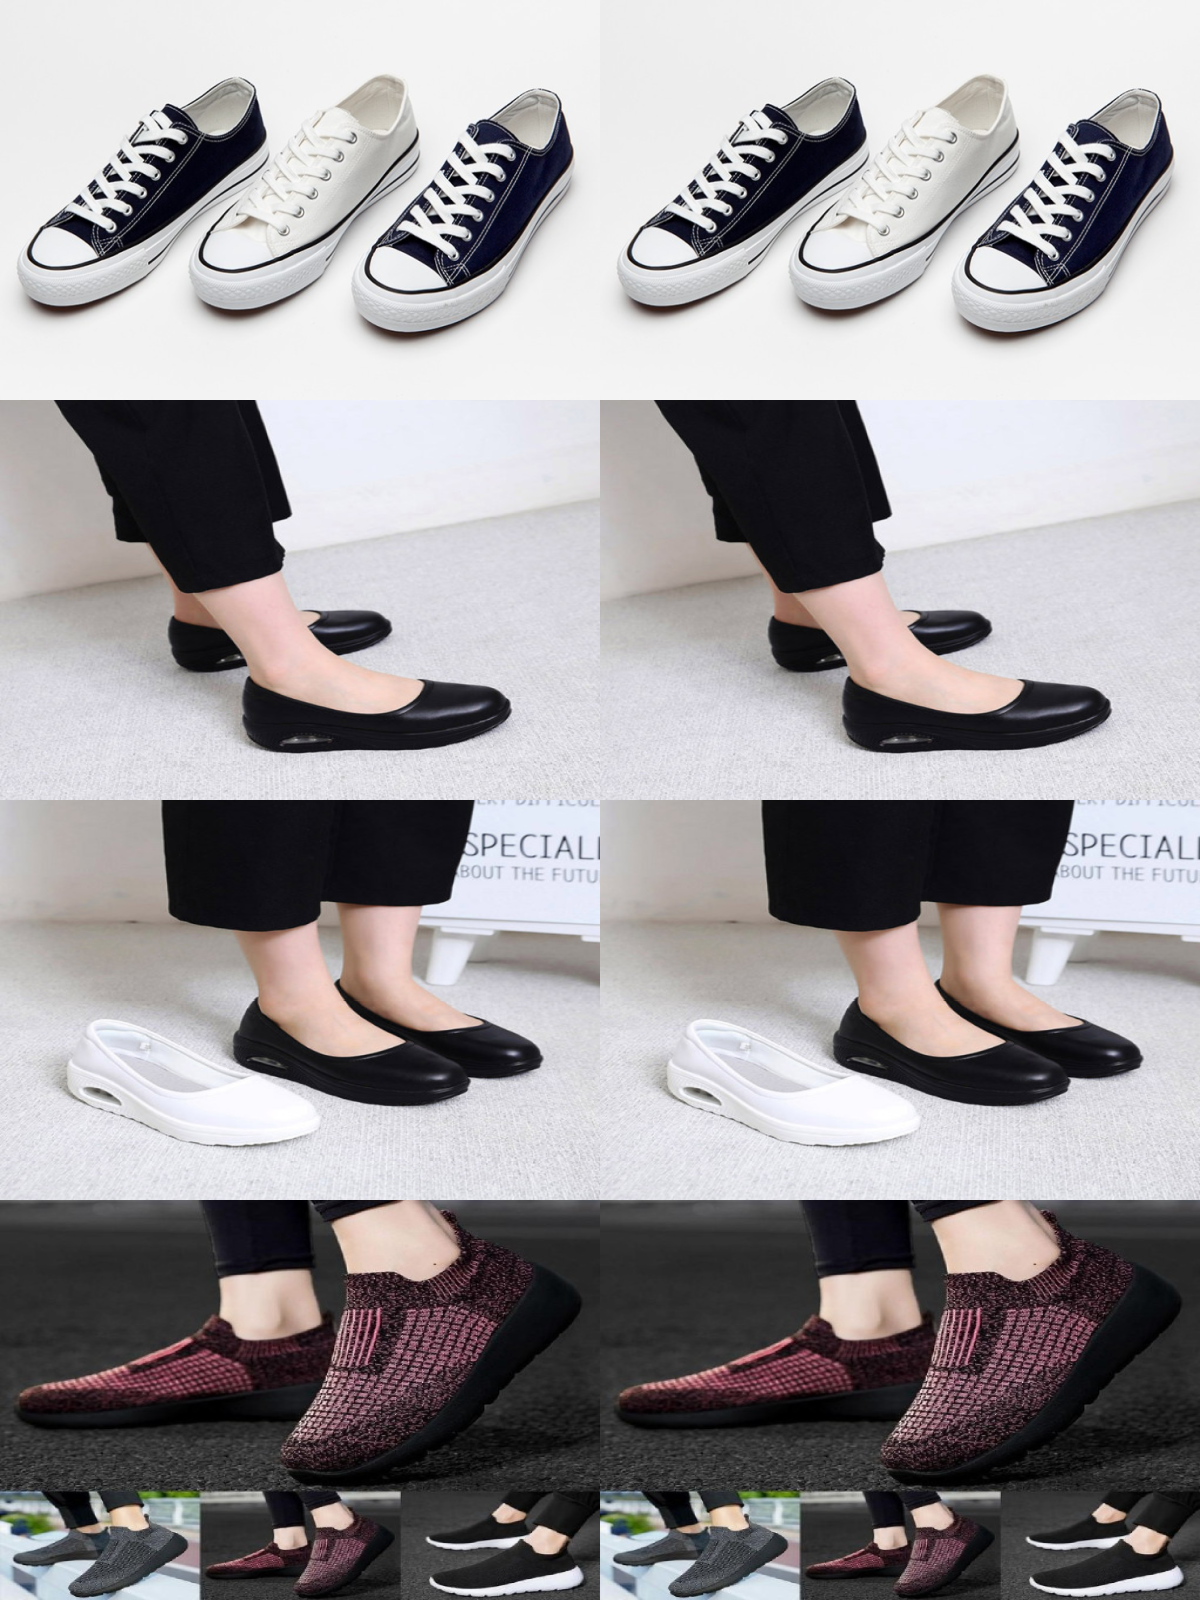

In [ ]:
import os
import cv2
import numpy as np

def 이미지_크기_조정(이미지, 목표_높이, 목표_너비):
    return cv2.resize(이미지, (목표_너비, 목표_높이), interpolation=cv2.INTER_AREA)

def 이미지_1분할_4부분으로_붙이기(폴더_경로):
    이미지_파일들 = [파일 for 파일 in os.listdir(폴더_경로) if 파일.endswith('.jpg') or 파일.endswith('.png')]

    # 모든 이미지를 동일한 크기로 조정
    이미지들 = []
    for 파일 in 이미지_파일들:
        이미지_경로 = os.path.join(폴더_경로, 파일)
        원본_이미지 = cv2.imread(이미지_경로)

        크기_조정된_이미지 = 이미지_크기_조정(원본_이미지, 목표_높이, 목표_너비)
        이미지들.append(크기_조정된_이미지)

    # 빈 이미지 생성
    결과_높이 = 목표_높이 * len(이미지들)
    결과_너비 = 목표_너비 * 2
    결과_이미지 = np.zeros((결과_높이, 결과_너비, 3), dtype=np.uint8)

    # 이미지를 붙이기 위한 y_offset
    y_offset = 0
    for 이미지 in 이미지들:
        높이, 너비 = 이미지.shape[:2]

        # 원본 이미지의 1/4 크기 부분을 결과 이미지에 붙이기
        결과_이미지[y_offset:y_offset+높이, :너비] = 이미지[:높이, :너비]
        결과_이미지[y_offset:y_offset+높이, 너비:] = 이미지[:높이, :너비]

        y_offset += 높이

    return 결과_이미지

# 사용 예제
폴더_경로 = '/content/002'  # 이미지들이 있는 폴더 경로로 대체
목표_높이 = 400
목표_너비 = 600

결과_이미지 = 이미지_1분할_4부분으로_붙이기(폴더_경로)

# 결과 이미지 표시하기
cv2_imshow(결과_이미지)
cv2.waitKey(0)
cv2.destroyAllWindows()

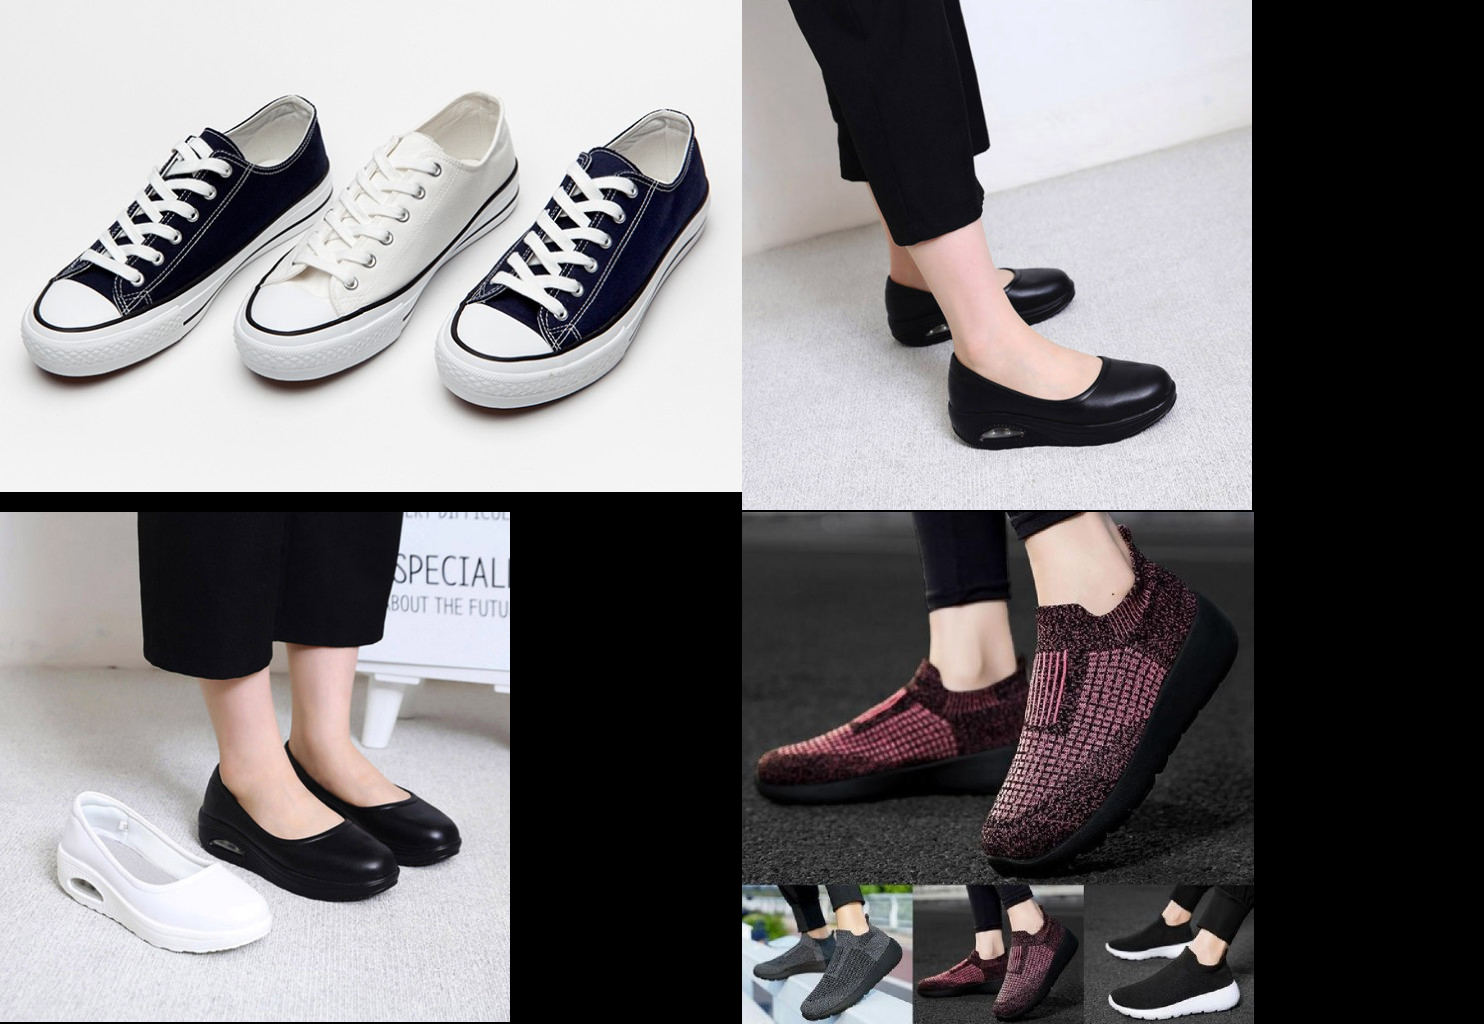

In [ ]:
import cv2
import numpy as np

def attach_images(image_paths):
    if len(image_paths) != 4:
        raise ValueError("정확히 네 개의 이미지 경로를 제공해야 합니다.")

    images = [cv2.imread(path) for path in image_paths]

    # 각 이미지의 크기를 구함
    image_heights, image_widths = zip(*[image.shape[:2] for image in images])

    # 최종 결과물 이미지의 크기 결정 (가장 큰 이미지의 가로 및 세로 크기)
    result_height = max(image_heights)
    result_width = max(image_widths)

    # 네 개의 이미지를 결합할 빈 이미지 생성 (가장 큰 이미지의 크기에 맞춤)
    result_image = np.zeros((2 * result_height, 2 * result_width, 3), dtype=np.uint8)

    # 각 이미지를 네 개의 부분에 배치 (가장 큰 이미지의 크기에 맞춰서 배치)
    result_image[:image_heights[0], :image_widths[0]] = images[0]  # 좌상단 부분
    result_image[:image_heights[1], result_width:result_width + image_widths[1]] = images[1]  # 우상단 부분
    result_image[result_height:result_height + image_heights[2], :image_widths[2]] = images[2]  # 좌하단 부분
    result_image[result_height:result_height + image_heights[3], result_width:result_width + image_widths[3]] = images[3]  # 우하단 부분

    return result_image

# 사용 예제
paths = '/content/002'
folder_paths = os.listdir(paths)  # 원하는 이미지 경로로 대체
image_paths = [f'{paths}/{i}'for i in folder_paths if i[-4:] == '.jpg']

attached_image = attach_images(image_paths)
cv2_imshow( attached_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image_paths

['/content/002/920279_6.jpg',
 '/content/002/920279_4.jpg',
 '/content/002/.ipynb_checkpoints',
 '/content/002/920279_3.jpg',
 '/content/002/920279_5.jpg']

In [ ]:
# 모자이크
import os
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

def load_image(path, index):
    image = cv2.imread(os.path.join(path, image_list[index]), cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0

    return image

def cutmix(path,index, imsize):
    w, h = imsize, imsize
    s = imsize // 2

    # 중앙값 랜덤하게 잡기
    xc, yc = [int(random.uniform(imsize*0.5, imsize*0.5)) for _ in range(2)] #256 ~ 768
    indexes = [index] + [random.randint(0, index) for _ in range(3)]

    #검은색 배경의 임의 이미지 생성 (여기다가 이미지들 붙여넣는 방식)
    result_img = np.full((imsize, imsize, 3), 1, dtype=np.float32)

    for i, index in enumerate(indexes):
        image = load_image(path, index)


        #top left
        if i == 0:
            x1a, y1a, x2a, y2a = max(xc - w, 0), max(yc - h, 0), xc, yc  # xmin, ymin, xmax, ymax (large image)
            x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h  # xmin, ymin, xmax, ymax (small image)
        elif i == 1:  # top right
            x1a, y1a, x2a, y2a = xc, max(yc - h, 0), min(xc + w, s * 2), yc
            x1b, y1b, x2b, y2b = 0, h - (y2a - y1a), min(w, x2a - x1a), h
        elif i == 2:  # bottom left
            x1a, y1a, x2a, y2a = max(xc - w, 0), yc, xc, min(s * 2, yc + h)
            x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, max(xc, w), min(y2a - y1a, h)
        elif i == 3:  # bottom right
            x1a, y1a, x2a, y2a = xc, yc, min(xc + w, s * 2), min(s * 2, yc + h)
            x1b, y1b, x2b, y2b = 0, 0, min(w, x2a - x1a), min(y2a - y1a, h)

        result_img[y1a:y2a, x1a:x2a] = image[y1b:y2b, x1b:x2b]

    return result_img



image_path = '/content/002'
index_len = len(os.listdir(image_path))
image_list = os.listdir(image_path)

image = load_image(image_path, 4)

image_size = image.shape[0]

test = cutmix(image_path, 4, image_size)


cv2.imwrite('test1.jpg',test)

plt.imshow(test)
plt.show()

ValueError: ignored

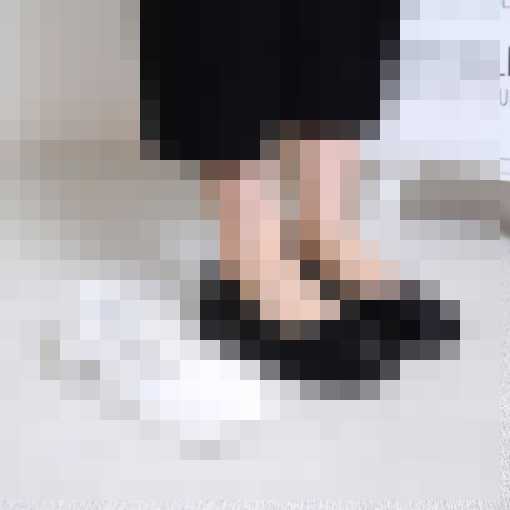

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def create_mosaic(image_path, mosaic_block_size):

    # 이미지 로드
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # 행과 열에 대한 모자이크 블록 수 계산
    num_blocks_x = width // mosaic_block_size
    num_blocks_y = height // mosaic_block_size

    # 이미지 처리를 통해 모자이크 생성
    for y in range(num_blocks_y):
        for x in range(num_blocks_x):
            # 각 모자이크 블록의 좌표 계산
            x1, y1 = x * mosaic_block_size, y * mosaic_block_size
            x2, y2 = x1 + mosaic_block_size, y1 + mosaic_block_size

            # 모자이크 블록의 평균 색상 계산
            average_color = np.mean(image[y1:y2, x1:x2], axis=(0, 1)).astype(np.uint8)

            # 모자이크 블록을 평균 색상으로 채움
            image[y1:y2, x1:x2] = average_color

    return image

# 사용 예제
input_image_path = '/content/002/920279_3.jpg' #'경로/입력/이미지.jpg'
mosaic_block_size = 20  # 각 모자이크 블록의 크기 설정 (예: 20)

mosaic_image = create_mosaic(input_image_path, mosaic_block_size)
cv2_imshow( mosaic_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 컷믹스_GPT

#### 이미지 좌표 랜덤하게 설정

In [ ]:
import numpy as np
from PIL import Image

def cutmix(img1, img2, label1, label2, alpha=1.0):
    """
    두 이미지와 해당 레이블에 CutMix 증강을 적용합니다.

    매개변수:
        img1 (PIL 이미지): 첫 번째 이미지.
        img2 (PIL 이미지): 두 번째 이미지.
        label1 (int): 첫 번째 이미지의 레이블.
        label2 (int): 두 번째 이미지의 레이블.
        alpha (float): CutMix 강도를 제어하는 하이퍼파라미터.

    반환:
        mixed_img (PIL 이미지): 혼합된 이미지.
        mixed_label (int): 혼합된 레이블.
    """

    w, h = img1.size
    img2 = img2.resize((w, h))
    lam = np.random.beta(alpha, alpha)

    # 랜덤한 바운딩 박스 좌표 생성
    bbx1, bby1, bbx2, bby2 = rand_bbox(w, h, lam)

    # img2의 일부를 자르고 img1 위에 붙입니다.
    mixed_img = img1.copy()
    region = img2.crop((bbx1, bby1, bbx2, bby2))
    mixed_img.paste(region, (bbx1, bby1))

    # 혼합된 비율에 따라 레이블 조정
    mixed_label = lam * label1 + (1.0 - lam) * label2

    # 혼합된 이미지에 투명도 적용
    mixed_img.putalpha(int(alpha * 255))

    return mixed_img, mixed_label

In [ ]:
import numpy as np
from PIL import Image

def rand_bbox(width, height, lam):
    """
    랜덤한 바운딩 박스 좌표를 생성합니다.

    매개변수:
        width (int): 이미지의 너비.
        height (int): 이미지의 높이.
        lam (float): 바운딩 박스 크기를 조절하는 하이퍼파라미터.

    반환:
        bbx1 (int): 바운딩 박스의 좌측 상단 x-좌표.
        bby1 (int): 바운딩 박스의 좌측 상단 y-좌표.
        bbx2 (int): 바운딩 박스의 우측 하단 x-좌표.
        bby2 (int): 바운딩 박스의 우측 하단 y-좌표.
    """
    # 패딩값 포함
    # cut_ratio = np.sqrt(1.0 - lam)
    # cut_w = int(width * cut_ratio)
    # cut_h = int(height * cut_ratio)

    # cx = np.random.randint(width)
    # cy = np.random.randint(height)

    # bbx1 = np.clip(cx - cut_w // 2, 0, width)
    # bby1 = np.clip(cy - cut_h // 2, 0, height)
    # bbx2 = np.clip(cx + cut_w // 2, 0, width)
    # bby2 = np.clip(cy + cut_h // 2, 0, height)

    # 패딩값 미포함

    cut_ratio = np.sqrt(1.0 - lam)
    cut_w = int(width * cut_ratio)
    cut_h = int(height * cut_ratio)

    cx = np.random.randint(cut_w // 2, width - cut_w // 2)
    cy = np.random.randint(cut_h // 2, height - cut_h // 2)

    bbx1 = cx - cut_w // 2
    bby1 = cy - cut_h // 2
    bbx2 = cx + cut_w // 2
    bby2 = cy + cut_h // 2

    return bbx1, bby1, bbx2, bby2

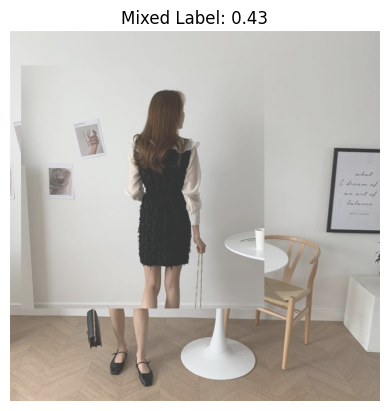

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로 설정
img_path1 = "/content/data/dress/1017579.jpg"
img_path2 = "/content/data/dress/1017589.jpg"

# 이미지 파일을 PIL 이미지로 로드
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

# CutMix 증강 수행
mixed_img, mixed_label = cutmix(img1, img2, alpha=0.8)

# 이미지와 레이블 출력
plt.imshow(mixed_img)
plt.title("Mixed Label: {:.2f}".format(mixed_label))
plt.axis('off')  # 축 표시하지 않음
plt.show()

#### bbox 좌표로 생성

In [ ]:
def cutmix(img1, img2, bbox_ratio_path, alpha=1.0):
    # PIL 이미지를 넘파이 배열로 변환합니다.
    img1 = np.array(img1)
    img2 = np.array(img2)

    # img2의 크기를 img1과 동일하게 조정합니다.
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # txt 파일에서 바운딩 박스 비율을 읽어옵니다.
    with open(bbox_ratio_path, 'r') as file:
        bbox_values = [float(value) for value in file.readline().strip().split(' ')]
        x_center_ratio, y_center_ratio, width_ratio, height_ratio = bbox_values[1:]

    # 바운딩 박스 비율을 이용하여 바운딩 박스 좌표를 계산합니다.
    w, h = img1.shape[1], img1.shape[0]
    bbx1, bby1, bbx2, bby2 = bbox_from_ratios(w, h, x_center_ratio, y_center_ratio, width_ratio, height_ratio)

    # img1과 img2를 혼합할 마스크를 생성합니다.
    mask = np.zeros_like(img1)
    mask[bby1:bby2, bbx1:bbx2, :] = 1

    # img2에 투명성을 적용합니다.
    blended_img = cv2.addWeighted(img1, alpha, img2, (1 - alpha), 0, dtype=cv2.CV_32F)

    # img2의 일부를 자르고 img1 위에 붙입니다.
    mixed_img = img1.copy()
    mixed_img[bby1:bby2, bbx1:bbx2, :] = blended_img[bby1:bby2, bbx1:bbx2, :]

    # 넘파이 배열을 다시 PIL 이미지로 변환합니다.
    mixed_img = Image.fromarray(np.uint8(mixed_img))

    return mixed_img

def bbox_from_ratios(width, height, x_center_ratio, y_center_ratio, width_ratio, height_ratio):
    # 바운딩 박스 비율로부터 바운딩 박스 좌표를 계산합니다.
    x_center = int(x_center_ratio * width)
    y_center = int(y_center_ratio * height)
    w = int(width_ratio * width)
    h = int(height_ratio * height)

    bbx1 = max(0, x_center - w // 2)
    bby1 = max(0, y_center - h // 2)
    bbx2 = min(width, x_center + w // 2)
    bby2 = min(height, y_center + h // 2)

    return bbx1, bby1, bbx2, bby2

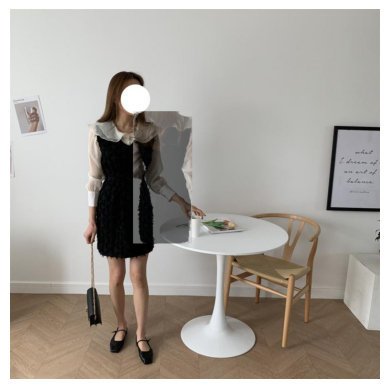

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로 설정
img_path1 = "/content/data/dress/1017579.jpg"
img_path2 = "/content/data/dress/1017589.jpg"

# 이미지 파일을 PIL 이미지로 로드
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

# txt 파일 경로 설정
bbox_path = f'{img_path2[:-4]}.txt'

# CutMix 증강 수행
mixed_img = cutmix(img1, img2, bbox_path, alpha=0.5)

# 이미지와 레이블 출력
plt.imshow(mixed_img)
plt.axis('off')  # 축 표시하지 않음
plt.show()

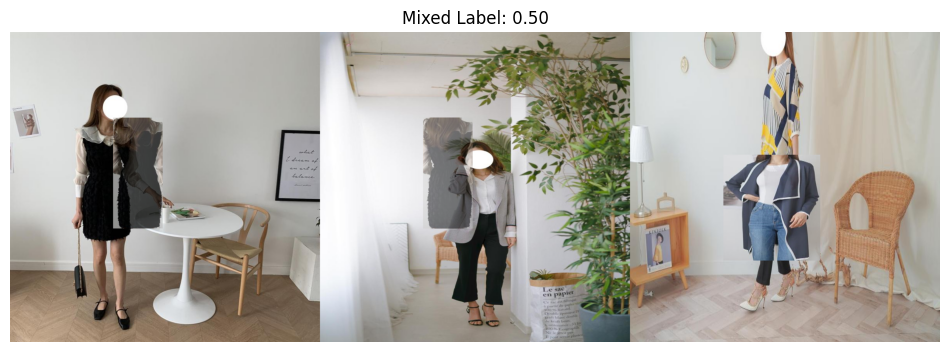

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# 이미지 파일 경로 설정
img_path1 = "/content/data/dress/1017579.jpg"
img_path2 = "/content/data/dress/1017589.jpg"

img_path3 = "/content/data/outer/1007194.jpg"
img_path4 = "/content/data/dress/1017589.jpg"

img_path5 = "/content/data/pants_black/1001376.jpg"
img_path6 = "/content/data/pants_jeans/1016846.jpg"

# 이미지 파일을 PIL 이미지로 로드
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

img3 = Image.open(img_path3)
img4 = Image.open(img_path4)

img5 = Image.open(img_path5)
img6 = Image.open(img_path6)

# txt 파일 경로 설정
bbox_path1 = f'{img_path2[:-4]}.txt'
bbox_path2 = f'{img_path4[:-4]}.txt'
bbox_path3 = f'{img_path6[:-4]}.txt'

# CutMix 증강 수행
mixed_img1 = cutmix(img1, img2, bbox_path1, alpha=0.3)
mixed_img2 = cutmix(img3, img4, bbox_path2, alpha=0.5)
mixed_img3 = cutmix(img5, img6, bbox_path3, alpha=0.1)

## 이미지 출력
# 이미지 크기를 조정할 너비를 설정합니다.
width = 800

# mixed_img1의 너비와 높이 정보를 얻습니다.
img_width, img_height = mixed_img1.size

# mixed_img1의 너비에 맞게 높이를 조정합니다.
height = int(width * img_height / img_width)

# 이미지 크기를 조정합니다.
mixed_img1_resized = mixed_img1.resize((width, height))
mixed_img2_resized = mixed_img2.resize((width, height))
mixed_img3_resized = mixed_img3.resize((width, height))

# 세 개의 이미지를 가로로 합칩니다.
combined_image = np.hstack((mixed_img1_resized, mixed_img2_resized, mixed_img3_resized))
cv2.imwrite(combined_image)
# 새로운 figure를 생성하고 크기를 설정합니다.
plt.figure(figsize=(12, 6))  # 가로 12, 세로 6

# 그림과 라벨을 표시합니다.
plt.imshow(combined_image)
plt.title("Mixed Label: {:.2f}".format(mixed_label))
plt.axis('off')  # 축 표시하지 않음
plt.show()